In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mnist_data.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

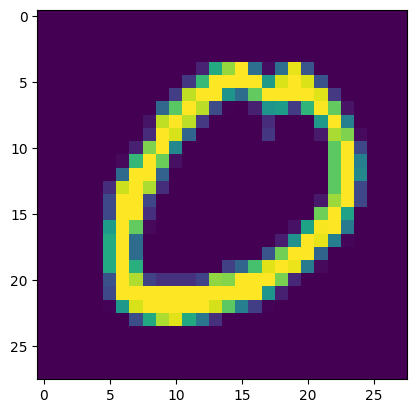

In [4]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape , X_test.shape

((33600, 784), (8400, 784))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.49%


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      0.96       835
           9       0.94      0.95      0.95       838

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



## Applying PCA :

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# pca = PCA(n_components=None)  No. of PCs = No. of features
pca = PCA(n_components=200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [18]:
X_train_trf.shape  , X_test_trf.shape

((33600, 200), (8400, 200))

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test_trf)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.07%


In [23]:
for i in range(1,20):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)

    print(f"For {i} PCs : {accuracy_score(y_test,y_pred)}")


For 1 PCs : 0.2580952380952381
For 2 PCs : 0.3236904761904762
For 3 PCs : 0.5104761904761905
For 4 PCs : 0.6663095238095238
For 5 PCs : 0.7378571428571429
For 6 PCs : 0.8227380952380953
For 7 PCs : 0.8436904761904762
For 8 PCs : 0.8721428571428571
For 9 PCs : 0.886547619047619
For 10 PCs : 0.9055952380952381
For 11 PCs : 0.9116666666666666
For 12 PCs : 0.9184523809523809
For 13 PCs : 0.9276190476190476
For 14 PCs : 0.9351190476190476
For 15 PCs : 0.9384523809523809
For 16 PCs : 0.9379761904761905
For 17 PCs : 0.9407142857142857
For 18 PCs : 0.94
For 19 PCs : 0.9425


## EDA :

In [33]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
X_train_trf.shape

(33600, 2)

In [35]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [40]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023401])

In [41]:
# Eigen vectors
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [43]:
pca.components_.shape

(2, 784)

In [44]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 ])

In [45]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [46]:
pca.explained_variance_.shape

(784,)

In [47]:
pca.components_.shape

(784, 784)

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

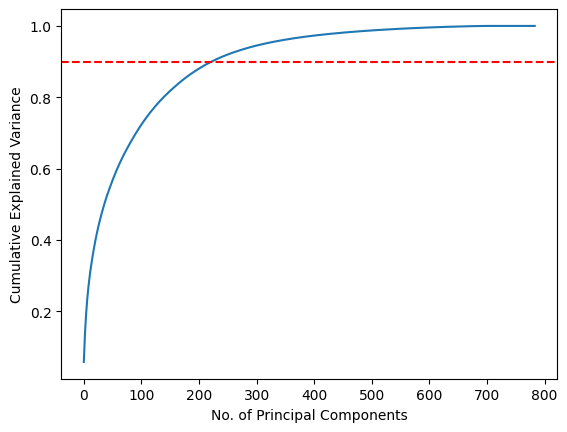

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of Principal Components")
plt.ylabel("Cumulative Explained Variance") 
plt.axhline(y=0.9, color='r', linestyle='--')